

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



## Inicialização 

In [1]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

## Carregue os dados

O conjunto de dados é armazenado na pasta `/datasets/faces/`, onde você pode encontrar "
- A pasta `final_files` com 7,6k fotos "
- O arquivo `labels.csv` com rótulos, com duas colunas: `file_name` e `real_age` 

Dado que o número de arquivos de imagem é bastante alto, é aconselhável evitar a leitura de todos de uma vez, o que consumiria muito recursos computacionais. Recomendamos que você crie um gerador com o ImageDataGenerator. Este método foi explicado no Capítulo 3, Lição 7 deste curso.

O arquivo de rótulo pode ser carregado como um arquivo CSV normal.

In [2]:
labels_file = '/datasets/faces/labels.csv'
image_dir = '/datasets/faces/final_files/'

In [3]:
labels_df = pd.read_csv(labels_file)

In [4]:
print(f"Tamanho do conjunto de dados: {len(labels_df)}")

Tamanho do conjunto de dados: 7591


In [5]:
train_datagen = ImageDataGenerator(validation_split=0.25,horizontal_flip=True,rescale=1./255)

In [6]:
test_datagen = ImageDataGenerator(validation_split=0.25,rescale=1./255)

## EDA

In [7]:
labels_df['real_age'].value_counts().head(10)

30    317
25    315
27    229
26    226
28    217
23    213
24    211
18    193
16    193
19    180
Name: real_age, dtype: int64

In [8]:
labels_df['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

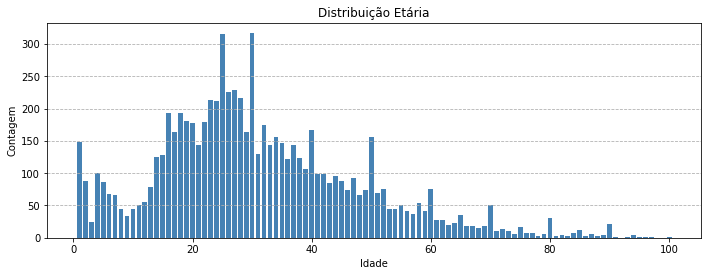

In [9]:
distribuicao_etaria = labels_df['real_age'].value_counts()
# Defina a cor das barras
cor_barras = 'steelblue'

# Crie o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 4))

# Crie o gráfico de barras
ax.bar(distribuicao_etaria.index, distribuicao_etaria.values, color='steelblue')

# Adicione uma grade ao gráfico
ax.grid(axis='y', linestyle='--')

# Adicione rótulos e título ao gráfico
ax.set_xlabel('Idade')
ax.set_ylabel('Contagem')
ax.set_title('Distribuição Etária')

# Personalize o estilo do gráfico
plt.rcParams['font.size'] = 12

# Ajuste o espaçamento entre as barras
plt.tight_layout()

# Exiba o gráfico
plt.show()

Found 7591 validated image filenames.


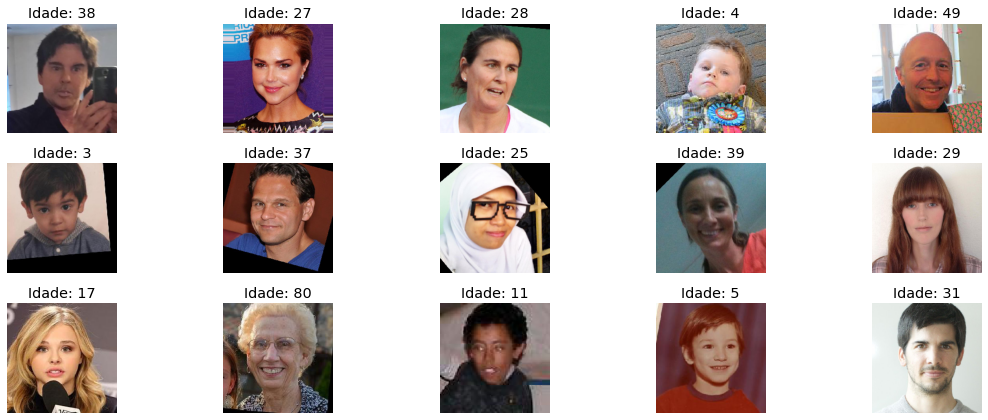

In [10]:
labels_df = pd.read_csv('/datasets/faces/labels.csv')

# Crie um gerador de dados de imagem
data_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_dataframe(
    dataframe=labels_df,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

# Exiba algumas imagens e suas idades correspondentes
fig, axs = plt.subplots(3, 5, figsize=(16, 6))
axs = axs.flatten()

for i in range(15):
    x_batch, y_batch = next(train_generator)
    axs[i].imshow(x_batch[0])
    axs[i].set_title(f"Idade: {y_batch[0]}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

### Conclusões

Acima podemos ver a distribuição da faixa de idade e das contagem de cada idade. não há nada errado com o nosso dados, pronto para fazer a modelagem dos dados, fizemos a validação e plotamos algumas imagens.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a distribuição dos dados.

Sempre importante esse foco na análise quantitava dos dados.
    
Por se tratar de um modelo de visão computacional, entendo que seria super bem-vinda a visualização de algumas das imagens e uma validação da idade correspondente. Entendo que esse componente qualitativo será super positivo por aqui.
</div>


## Modelagem 

Defina as funções necessárias para treinar seu modelo na plataforma GPU e construa um único script contendo todas elas junto com a seção de inicialização.

Para facilitar essa tarefa, você pode defini-las neste notebook e executar um código pronto na próxima seção para compor o script automaticamente.
As definições abaixo também serão verificadas pelos revisores do projeto, para que possam entender como você construiu o modelo.

In [11]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [12]:
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [13]:
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [14]:
def create_model(input_shape=()):
    model = Sequential()
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='relu'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model



In [15]:
def train_model(model, train_data, test_data, batch_size=None, epochs=30, steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model


## Preparar o Script para a Execução na plataforma GPU

Dado que você definiu as funções necessárias, você pode compor um script para a plataforma GPU, baixá-lo através do menu "Arquivo|Abrir..." e carregá-lo posteriormente para execução na plataforma GPU.

Nota: O script também deve incluir a seção de inicialização. Um exemplo disso é mostrado abaixo.

In [16]:
# preparar um script para ser executado na plataforma GPU


init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Resultado

Coloque a saída da plataforma GPU como uma célula Markdown aqui.

2023-11-28 23:58:17.726067: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2023-11-28 23:58:17.808728: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2023-11-28 23:58:22.623826: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-11-28 23:58:22.736190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:22.736391: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-11-28 23:58:22.736432: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-11-28 23:58:22.736493: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-11-28 23:58:22.843910: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-11-28 23:58:22.856383: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-11-28 23:58:23.088962: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-11-28 23:58:23.108066: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-11-28 23:58:23.108123: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-11-28 23:58:23.108263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:23.108556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:23.108747: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-11-28 23:58:23.109221: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-11-28 23:58:23.140096: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300010000 Hz
2023-11-28 23:58:23.144252: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x376b0d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-11-28 23:58:23.144304: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-11-28 23:58:23.333982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:23.334322: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x15a9720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-28 23:58:23.334343: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-11-28 23:58:23.334591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:23.334795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2023-11-28 23:58:23.334856: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-11-28 23:58:23.334885: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-11-28 23:58:23.334918: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2023-11-28 23:58:23.334940: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2023-11-28 23:58:23.334945: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2023-11-28 23:58:23.334965: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2023-11-28 23:58:23.334968: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2023-11-28 23:58:23.335048: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:23.335309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:23.335457: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2023-11-28 23:58:23.345910: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-11-28 23:58:25.281542: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-11-28 23:58:25.281599: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2023-11-28 23:58:25.281610: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2023-11-28 23:58:25.283081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:25.283338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-28 23:58:25.283510: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-11-28 23:58:25.283563: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14988 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 5s
12107776/94765736 [==>...........................] - ETA: 0s
25067520/94765736 [======>.......................] - ETA: 0s
38182912/94765736 [===========>..................] - ETA: 0s
51372032/94765736 [===============>..............] - ETA: 0s
64462848/94765736 [===================>..........] - ETA: 0s
77643776/94765736 [=======================>......] - ETA: 0s
90882048/94765736 [===========================>..] - ETA: 0s
94773248/94765736 [==============================] - 0s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/30
2023-11-28 23:58:43.259469: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-11-28 23:58:44.394865: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 65s - loss: 11.8444 - mean_absolute_error: 11.8450 - val_loss: 28.2669 - val_mean_absolute_error: 28.2721
Epoch 2/30
356/356 - 38s - loss: 7.8654 - mean_absolute_error: 7.8662 - val_loss: 9.3321 - val_mean_absolute_error: 9.3299
Epoch 3/30
356/356 - 38s - loss: 6.8138 - mean_absolute_error: 6.8142 - val_loss: 7.0628 - val_mean_absolute_error: 7.0735
Epoch 4/30
356/356 - 38s - loss: 6.1379 - mean_absolute_error: 6.1385 - val_loss: 7.4602 - val_mean_absolute_error: 7.4599
Epoch 5/30
356/356 - 38s - loss: 5.4952 - mean_absolute_error: 5.4950 - val_loss: 7.2094 - val_mean_absolute_error: 7.2137
Epoch 6/30
356/356 - 38s - loss: 5.1860 - mean_absolute_error: 5.1866 - val_loss: 6.1737 - val_mean_absolute_error: 6.1765
Epoch 7/30
356/356 - 38s - loss: 4.8381 - mean_absolute_error: 4.8385 - val_loss: 6.6283 - val_mean_absolute_error: 6.6253
Epoch 8/30
356/356 - 38s - loss: 4.3963 - mean_absolute_error: 4.3970 - val_loss: 6.5365 - val_mean_absolute_error: 6.5354
Epoch 9/30
356/356 - 38s - loss: 4.0435 - mean_absolute_error: 4.0434 - val_loss: 6.2418 - val_mean_absolute_error: 6.2502
Epoch 10/30
356/356 - 38s - loss: 3.8256 - mean_absolute_error: 3.8260 - val_loss: 6.0220 - val_mean_absolute_error: 6.0258
Epoch 11/30
356/356 - 38s - loss: 3.6216 - mean_absolute_error: 3.6218 - val_loss: 6.7579 - val_mean_absolute_error: 6.7589
Epoch 12/30
356/356 - 38s - loss: 3.4563 - mean_absolute_error: 3.4568 - val_loss: 6.1016 - val_mean_absolute_error: 6.1001
Epoch 13/30
356/356 - 38s - loss: 3.2190 - mean_absolute_error: 3.2193 - val_loss: 5.8603 - val_mean_absolute_error: 5.8677
Epoch 14/30
356/356 - 38s - loss: 3.0295 - mean_absolute_error: 3.0296 - val_loss: 5.9754 - val_mean_absolute_error: 5.9803
Epoch 15/30
356/356 - 39s - loss: 2.9239 - mean_absolute_error: 2.9236 - val_loss: 5.8022 - val_mean_absolute_error: 5.8088
Epoch 16/30
356/356 - 38s - loss: 2.8716 - mean_absolute_error: 2.8717 - val_loss: 5.9742 - val_mean_absolute_error: 5.9819
Epoch 17/30
356/356 - 38s - loss: 2.7594 - mean_absolute_error: 2.7597 - val_loss: 5.9796 - val_mean_absolute_error: 5.9855
Epoch 18/30
356/356 - 38s - loss: 2.7340 - mean_absolute_error: 2.7339 - val_loss: 5.8622 - val_mean_absolute_error: 5.8711
Epoch 19/30
356/356 - 38s - loss: 2.6492 - mean_absolute_error: 2.6494 - val_loss: 5.9051 - val_mean_absolute_error: 5.9060
Epoch 20/30
356/356 - 38s - loss: 2.5328 - mean_absolute_error: 2.5328 - val_loss: 5.6940 - val_mean_absolute_error: 5.7053
Epoch 21/30
356/356 - 38s - loss: 2.4997 - mean_absolute_error: 2.4999 - val_loss: 6.5446 - val_mean_absolute_error: 6.5467
Epoch 22/30
356/356 - 38s - loss: 2.4671 - mean_absolute_error: 2.4672 - val_loss: 5.6878 - val_mean_absolute_error: 5.6928
Epoch 23/30
356/356 - 38s - loss: 2.3871 - mean_absolute_error: 2.3871 - val_loss: 6.0314 - val_mean_absolute_error: 6.0401
Epoch 24/30
356/356 - 38s - loss: 2.2966 - mean_absolute_error: 2.2966 - val_loss: 5.7896 - val_mean_absolute_error: 5.7936
Epoch 25/30
356/356 - 38s - loss: 2.2765 - mean_absolute_error: 2.2764 - val_loss: 5.8859 - val_mean_absolute_error: 5.8933
Epoch 26/30
356/356 - 38s - loss: 2.2272 - mean_absolute_error: 2.2273 - val_loss: 6.2331 - val_mean_absolute_error: 6.2370
Epoch 27/30
356/356 - 38s - loss: 2.1877 - mean_absolute_error: 2.1880 - val_loss: 6.1036 - val_mean_absolute_error: 6.1039
Epoch 28/30
356/356 - 38s - loss: 2.1525 - mean_absolute_error: 2.1527 - val_loss: 5.7983 - val_mean_absolute_error: 5.8048
Epoch 29/30
356/356 - 38s - loss: 2.1222 - mean_absolute_error: 2.1223 - val_loss: 6.1042 - val_mean_absolute_error: 6.1093
Epoch 30/30
356/356 - 38s - loss: 2.0900 - mean_absolute_error: 2.0902 - val_loss: 5.7855 - val_mean_absolute_error: 5.7889
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 5.7855 - mean_absolute_error: 5.7889
Test MAE: 5.7889

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Ótimo trablho com o modelo. Atingimos os requisitos de performance!
</div>


## Conclusão

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos.

Realizamos o pre-processamento e EDA, para que não tivesse acontecido algum problema na criação do nosso modelo.

Usamos o Keras e criamos funções necessárias para treinar o modelo na plataforma GPU,construimos um único script contendo todas elas junto com a seção de inicialização utilizamos o ResNet50 como classificação de imagens e detecção de objetos, adicionada a camada lobalAveragePooling2D realiza uma operação de pooling em uma imagem ou conjunto de imagens, reduzindo a dimensionalidade dos dados, Dense que é camada de rede neural que conecta todos os neurônios da camada anterior a todos os neurônios da camada atual, o Adam que é otimizador de gradiente descendente estocástico que é frequentemente usado para ajustar os pesos de uma rede neural durante o treinamento.

Utilizamos mean_absolute_error para função de perda e avaliação de métrica do nosso modelo que teve como resultado: MAE: 5.7889.

# Checklist

- [ ]  O notebook foi aberto 
- [ ]  O código está livre de erros 
- [ ]  As células com código foram organizadas por ordem de execução 
- [ ]  A análise exploratória dos dados foi realizada - [ ]  Os resultados da análise exploratória dos dados são apresentados no caderno final - [ ]  O valor EAM do modelo não é superior a 8 
- [ ]  O código de treinamento do modelo foi copiado para o notebook final 
- [ ]  A saída do treinamento do modelo foi copiada para o notebook final 
- [ ]  As conclusões foram fornecidas com base nos resultados do treinamento do modelo

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>